In [11]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import re

In [2]:
tn_areas = pd.read_json('C:/Users/cheft/Desktop/NSS/Capstone/capstone/data/tn-areas.jsonlines', lines=True)
tn_areas

,area_name,us_state,url,lnglat,metadata
0,Cherokee Bluff (CLOSED TO CLIMBING),Tennessee,https://www.mountainproject.com/area/106768062...,"[-83.9618, 35.9247]",{'lnglat_from_parent': False}
1,Buzzard Point,Tennessee,https://www.mountainproject.com/area/106308306...,"[-85.03099, 35.53775]",{'lnglat_from_parent': False}
2,Buffalo Rock on French Broad River,Tennessee,https://www.mountainproject.com/area/118222027...,"[-82.93149, 35.93945]",{'lnglat_from_parent': False}
3,Parking lot side of street,Tennessee,https://www.mountainproject.com/area/111134147...,"[-81.8151, 36.594]",{'lnglat_from_parent': False}
4,Main Wall,Tennessee,https://www.mountainproject.com/area/109843198...,"[-81.8151, 36.594]",{'lnglat_from_parent': False}
...,...,...,...,...,...
261,Hemlock Block Proper,Tennessee,https://www.mountainproject.com/area/118159566...,"[-85.19618, 35.29558]",{'lnglat_from_parent': False}
262,South Wall,Tennessee,https://www.mountainproject.com/area/112304684...,"[-82.61046, 36.50742]",{'lnglat_from_parent': False}
263,North Wall,Tennessee,https://www.mountainproject.com/area/112308107...,"[-82.61162, 36.50814]",{'lnglat_from_parent': False}
264,Main Wall,Tennessee,https://www.mountainproject.com/area/112304520...,"[-82.61059, 36.50774]",{'lnglat_from_parent': False}


In [3]:
# Pull lnglat into separate columns

lng = []
for index, row in tn_areas.iterrows():
    lng.append(tn_areas.lnglat[index][0])

lat = []
for index, row in tn_areas.iterrows():
    lat.append(tn_areas.lnglat[index][1])

# Add longitude and latitude columns

tn_areas['longitude'] = lng
tn_areas['latitude'] = lat

In [4]:
# Drop metadata column

tn_areas = tn_areas.drop(columns=['metadata'])

In [5]:
tn_areas

,area_name,us_state,url,lnglat,longitude,latitude
0,Cherokee Bluff (CLOSED TO CLIMBING),Tennessee,https://www.mountainproject.com/area/106768062...,"[-83.9618, 35.9247]",-83.96180,35.92470
1,Buzzard Point,Tennessee,https://www.mountainproject.com/area/106308306...,"[-85.03099, 35.53775]",-85.03099,35.53775
2,Buffalo Rock on French Broad River,Tennessee,https://www.mountainproject.com/area/118222027...,"[-82.93149, 35.93945]",-82.93149,35.93945
3,Parking lot side of street,Tennessee,https://www.mountainproject.com/area/111134147...,"[-81.8151, 36.594]",-81.81510,36.59400
4,Main Wall,Tennessee,https://www.mountainproject.com/area/109843198...,"[-81.8151, 36.594]",-81.81510,36.59400
...,...,...,...,...,...,...
261,Hemlock Block Proper,Tennessee,https://www.mountainproject.com/area/118159566...,"[-85.19618, 35.29558]",-85.19618,35.29558
262,South Wall,Tennessee,https://www.mountainproject.com/area/112304684...,"[-82.61046, 36.50742]",-82.61046,36.50742
263,North Wall,Tennessee,https://www.mountainproject.com/area/112308107...,"[-82.61162, 36.50814]",-82.61162,36.50814
264,Main Wall,Tennessee,https://www.mountainproject.com/area/112304520...,"[-82.61059, 36.50774]",-82.61059,36.50774


In [6]:
gdf = gpd.GeoDataFrame(tn_areas, geometry=gpd.points_from_xy(x=tn_areas.longitude, y=tn_areas.latitude))

In [7]:
gdf

,area_name,us_state,url,lnglat,longitude,latitude,geometry
0,Cherokee Bluff (CLOSED TO CLIMBING),Tennessee,https://www.mountainproject.com/area/106768062...,"[-83.9618, 35.9247]",-83.96180,35.92470,POINT (-83.96180 35.92470)
1,Buzzard Point,Tennessee,https://www.mountainproject.com/area/106308306...,"[-85.03099, 35.53775]",-85.03099,35.53775,POINT (-85.03099 35.53775)
2,Buffalo Rock on French Broad River,Tennessee,https://www.mountainproject.com/area/118222027...,"[-82.93149, 35.93945]",-82.93149,35.93945,POINT (-82.93149 35.93945)
3,Parking lot side of street,Tennessee,https://www.mountainproject.com/area/111134147...,"[-81.8151, 36.594]",-81.81510,36.59400,POINT (-81.81510 36.59400)
4,Main Wall,Tennessee,https://www.mountainproject.com/area/109843198...,"[-81.8151, 36.594]",-81.81510,36.59400,POINT (-81.81510 36.59400)
...,...,...,...,...,...,...,...
261,Hemlock Block Proper,Tennessee,https://www.mountainproject.com/area/118159566...,"[-85.19618, 35.29558]",-85.19618,35.29558,POINT (-85.19618 35.29558)
262,South Wall,Tennessee,https://www.mountainproject.com/area/112304684...,"[-82.61046, 36.50742]",-82.61046,36.50742,POINT (-82.61046 36.50742)
263,North Wall,Tennessee,https://www.mountainproject.com/area/112308107...,"[-82.61162, 36.50814]",-82.61162,36.50814,POINT (-82.61162 36.50814)
264,Main Wall,Tennessee,https://www.mountainproject.com/area/112304520...,"[-82.61059, 36.50774]",-82.61059,36.50774,POINT (-82.61059 36.50774)


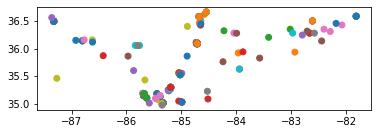

In [8]:
gdf.plot(column='area_name');

In [10]:
gdf.url[0]

'https://www.mountainproject.com/area/106768062/cherokee-bluff-closed-to-climbing'